In [1]:
from rmgpy.molecule import Molecule
from IPython.display import display
import random

In [2]:
def count_up():
    i=0
    while True:
        i += 1
        yield i

In [3]:
def display_random_alkane(N):
    """Displays N randomly generated alkane molecule images"""
    n = 0
    while n<N:
        counts = count_up()  # Used to increment ring label  numbers
        # fragment[0]: alkyl chain, fragment[1]: ring
        fragment_list = [('C', (0, 1)), ('C{0}{1}C{0}', (0, 0.1))]  # (fragment_base_pattern, (lognorm_mean, lognorm_variance))
        ring_list = [4]*5 + [3]*4 + [2]  # 5/10 chance for 6 member ring, 4/10 chance for 5 member ring, 1/10 for 4 member ring 
        smile_string = ''
        while True:
            action_variable = random.normalvariate(0, 1)  # Decide what to do based on this random number

            if action_variable < -1:  # Add ring
                fragment = (fragment_list[1][0].format(counts.next(), 'C'*ring_list[random.randint(0, 9)]), 
                            fragment_list[1][1])
            elif action_variable < 0.5:  # Add alkyl chain
                fragment = fragment_list[0]
            elif smile_string != '':  # Molecule is finished
                break
            else:  # Molecule is blank, start over
                continue

            smile_addition = fragment[0]*(int(random.lognormvariate(*fragment[1]))+1)

            if smile_string == '':
                smile_string = smile_addition
            else:  # Add fragment to random position in the existing SMILES string
                index = random.randint(0, len(smile_string)-1)
                if index == 0:
                    smile_string = smile_addition + smile_string
                else:
                    smile_string = smile_string[:index] + '({})'.format(smile_addition) + smile_string[index:]

        try:
            molecule = Molecule().fromSMILES(smile_string)
            molecule.toSMARTS()  # To check for valency issues (i.e. carbon with 5 bonds)
            display(molecule)
        except:  # Invalid molecule was achieved, start over
            display_random_alkane(1)
            
        n += 1

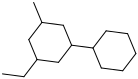

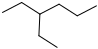

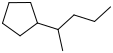

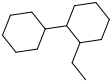

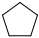

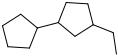

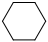

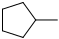

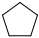

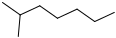

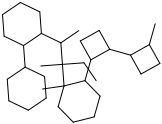

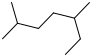

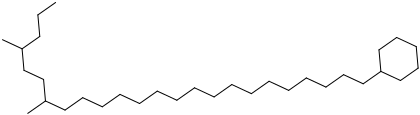

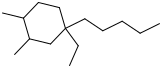

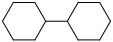

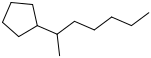

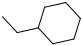

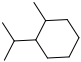

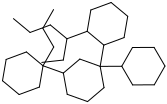

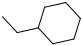

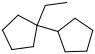

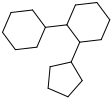

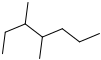

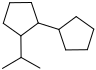

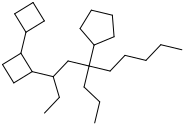

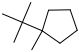

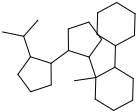

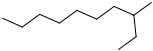

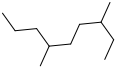

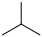

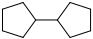

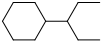

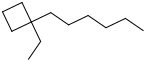

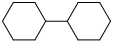

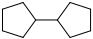

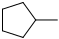

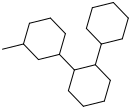

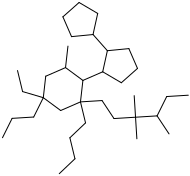

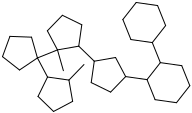

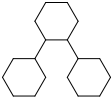

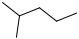

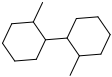

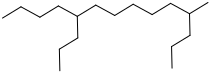

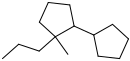

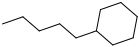

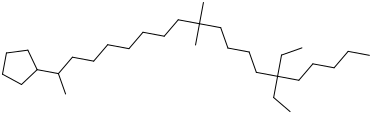

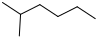

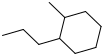

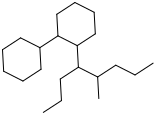

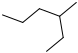

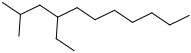

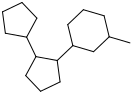

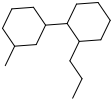

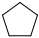

In [4]:
display_random_alkane(100)